SciPy optimize (minimize maximum absolute difference, various methods)

Method          SS Diff    Max diff    Min diff    Success    Message                                 
---------------------------------------------------------------------------------------------------------------------------
Nelder-Mead    0.004676    0.000973   -0.000970    True       Optimization terminated successfully.   
Powell        42.836108    0.096857   -0.096857    True       Optimization terminated successfully.   
CG            55.307308    0.107355   -0.107355    False      Desired error not necessarily achieved due to precision loss.
BFGS          86.360343    0.135518   -0.133186    False      Desired error not necessarily achieved due to precision loss.
L-BFGS-B      17.010731    0.064772   -0.064772    True       CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
TNC           59.293782    0.112022   -0.112021    True       Converged (|f_n-f_(n-1)| ~= 0)          
COBYLA        26.658194    0.08226

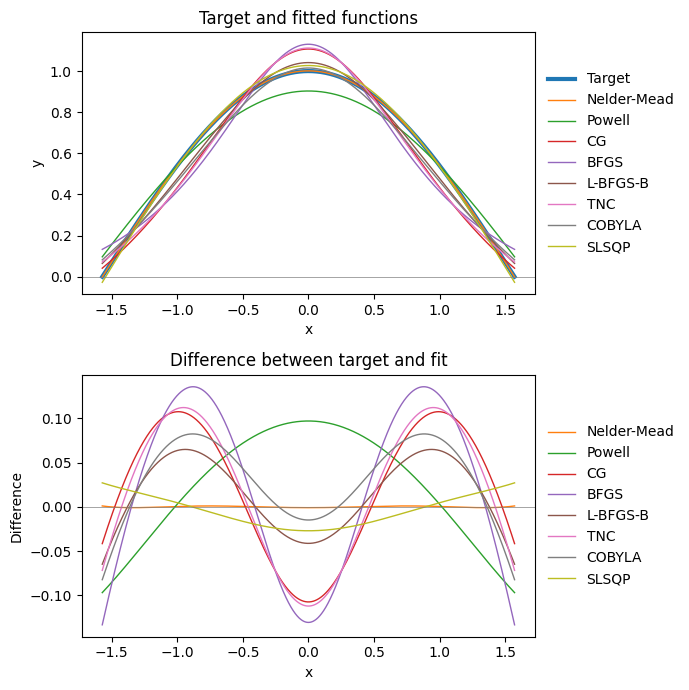

In [1]:
# Model 4
# Attempt to replicate https://www.johndcook.com/blog/2024/09/03/optimal-rational-approximation
# Works with parameters: b, c, d while A is constant.
# Use minimize function on max of abs differences.
# Try different methods. Some work better than others. 'Nelder-Mead' method works best.

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(results, x_data, y_data):
    plt.figure(figsize=(7, 7))
    colors = sns.color_palette('tab10', len(results)+1)

    # Plot the fits
    plt.subplot(2, 1, 1)
    plt.plot(x_data, y_data, label='Target', color=colors[0], linewidth=3)
    for i, (method, result_x, difference, success, message) in enumerate(results):
        plt.plot(x_data, model(x_data, *result_x), label=f'{method}', color=colors[i+1], linewidth=1)
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.title('Target and fitted functions')
    plt.xlabel('x')
    plt.ylabel('y')

    # Plot the differences
    plt.subplot(2, 1, 2)
    for i, (method, result_x, difference, success, message) in enumerate(results):
        plt.plot(x_data, difference, label=f'{method}', color=colors[i+1], linewidth=1)
    plt.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
    plt.title('Difference between target and fit')
    plt.xlabel('x')
    plt.ylabel('Difference')
    
    plt.tight_layout()
    plt.show()

def print_results(results, x_data, y_data, difference):
    print(f'{"Method":<12} {"SS Diff":>10}    {"Max diff":<8}    {"Min diff":<8}    {"Success":<8}   {"Message":<40}')
    print('-'*123)
    for method, result_x, difference, success, message in results:
        print(f'{method:<12} {np.sum((y_data - model(x_data, *result_x))**2):>10,.6f}  {max(difference):>10,.6f}  {min(difference):>10,.6f}    {str(success):<8}   {message:<40}')
    
def model(x, b, c, d):
    return (A + b * x**2) / (c + d * x**2)

def target_function(x):
    return np.cos(x)

def objective(guess, x, y):
    b, c, d = guess
    return np.max(np.abs(y - model(x, b, c, d)))

def main():
    print('SciPy optimize (minimize maximum absolute difference, various methods)')
    print('======================================================================\n')
    x_data = np.linspace(-np.pi/2, np.pi/2, NUMPOINTS)
    y_data = target_function(x_data)
    guess = [1, 1, 1]
    methods = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP']
    
    results = []
    for method in methods:
        result = minimize(objective, guess, args=(x_data, y_data), method=method)
        difference = y_data - model(x_data, *result.x)
        success = result.success
        message = result.message
        results.append([method, result.x, difference, success, message])
    
    print_results(results, x_data, y_data, difference)
    plot_results(results, x_data, y_data)

NUMPOINTS = 10000
A = np.pi**2

if __name__ == "__main__":
    main()